<a href="https://colab.research.google.com/github/Raksantos/A.I-Studying/blob/master/Deep_Learning_Introdu%C3%A7%C3%A3o_com_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 1: Conhecendo o conjunto de dados

In [ ]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

imagens_treino.shape

4423680/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

#Aula 2: Começando a montar o modelo

Text(0.5, 1.0, '9')

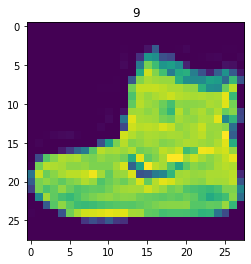

In [ ]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])

In [ ]:
print("Temos entre [%d, %d] classificações" % (identificacoes_treino.min(), identificacoes_treino.max())) 

Temos entre [0, 9] classificações


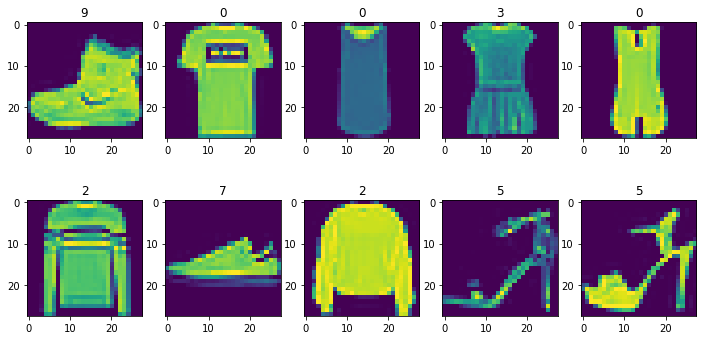

In [ ]:
plt.figure(figsize=(12,6))
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])  
  plt.title(identificacoes_treino[imagem])

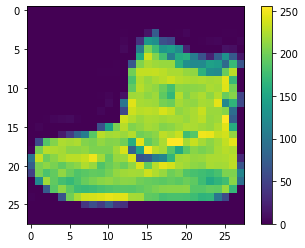

In [ ]:
nomes_classificacoes = ['Camiseta', 'Calça', "Pullover", "Vestido", "Casaco", "Sandália", "Camisa", "Tênis", "Bolsa", "Bota"]

'''
plt.figure(figsize=(12,6))
for imagem in range(10):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])  
  plt.title(nomes_classificacoes[identificacoes_treino[imagem]])
'''
plt.imshow(imagens_treino[0])
plt.colorbar()

#Aula 3: Adicionando camadas ocultas

In [ ]:
#Normalização das imagens
imagens_treino = imagens_treino/float(255)

modelo = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)), 
                           keras.layers.Dense(256, activation=tensorflow.nn.relu), 
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax)])

modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 1.5056 - accuracy: 0.5336 - val_loss: 0.7018 - val_accuracy: 0.7508
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6958 - accuracy: 0.7498 - val_loss: 0.5964 - val_accuracy: 0.7769
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5988 - accuracy: 0.7841 - val_loss: 0.5393 - val_accuracy: 0.8073
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5434 - accuracy: 0.8048 - val_loss: 0.5063 - val_accuracy: 0.8163
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5178 - accuracy: 0.8173 - val_loss: 0.4895 - val_accuracy: 0.8216


#Outras aulas e salvando modelo

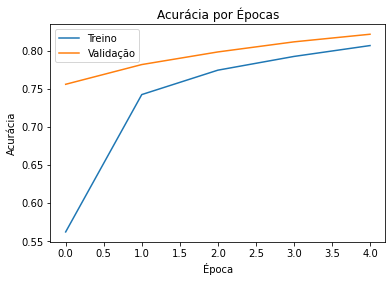

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por Épocas')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

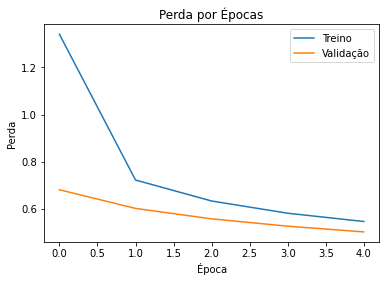

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por Épocas')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(['Treino', 'Validação'])

In [ ]:
testes = modelo.predict(imagens_teste)
print("Resultado teste:", np.argmax(testes[0]))
print("Número da imagem de teste:", identificacoes_teste[0])

Resultado teste: 9
Número da imagem de teste: 9


In [ ]:
perda_teste, accuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', accuracia_teste * 100)

313/313 [==============================] - 1s 2ms/step - loss: 43868.8555 - accuracy: 0.6843
Perda do teste: 43868.85546875
Acurácia do teste: 68.43000054359436


In [ ]:
from tensorflow.keras.models import load_model

modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

In [ ]:
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print("Número da imagem de teste:", identificacoes_teste[1])

resultado teste modelo salvo: 2
Número da imagem de teste: 2


#Sumário do modelo

In [ ]:
modelo = modelo_salvo
sumario_modelo = modelo.summary()
sumario_modelo

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


#Pesos da camada Dense

In [ ]:
pesos_camada_dense = modelo.layers[1].get_weights()[0]
pesos_camada_dense

array([[ 0.9329985 ,  0.5038977 ,  0.7504843 , ...,  0.94997716,
         0.09523156,  0.9459404 ],
       [ 0.5443761 ,  0.11480618,  0.85205406, ...,  0.54801923,
         0.7488612 , -0.12852946],
       [ 0.02977615,  0.33415687,  0.62264854, ...,  0.7529606 ,
        -0.11047983,  0.26684362],
       ...,
       [ 0.59470934,  0.3243402 ,  0.73353624, ...,  0.30301768,
         0.82037485, -0.72399205],
       [ 0.36580575,  0.14949267,  0.47575888, ...,  0.03170388,
         0.6112658 , -0.34881318],
       [ 0.08337901,  0.01043354,  0.7353513 , ...,  0.2136786 ,
         0.7736203 ,  0.516638  ]], dtype=float32)

In [ ]:
vieses_camada_dense = modelo.layers[1].get_weights()[1]
vieses_camada_dense.shape

(256,)

In [ ]:
print(pesos_camada_dense.shape)
pesos_camada_dense_zerados = np.zeros((784, 256))
pesos_camada_dense_aleatorios = np.random.rand(784, 256)

'''
modelo.layers[1].set_weights([pesos_camada_dense_zerados, vieses_camada_dense_zerados])
'''

modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense])

modelo.layers[1].get_weights()

(784, 256)


[array([[0.60110706, 0.88621104, 0.97934157, ..., 0.38672292, 0.3577892 ,
         0.16014752],
        [0.7451884 , 0.67170143, 0.10289326, ..., 0.22693963, 0.7677618 ,
         0.53986865],
        [0.32533675, 0.3603443 , 0.07346341, ..., 0.77913994, 0.11571135,
         0.8647518 ],
        ...,
        [0.7630903 , 0.55860865, 0.9817032 , ..., 0.8164169 , 0.7247013 ,
         0.9120849 ],
        [0.127305  , 0.12431207, 0.75120974, ..., 0.3596188 , 0.3547211 ,
         0.8979845 ],
        [0.6510566 , 0.7210557 , 0.52967685, ..., 0.26143774, 0.643251  ,
         0.6235728 ]], dtype=float32),
 array([ 0.00374058, -0.14450096, -0.10994441, -0.17938386, -0.03085069,
        -0.07186694, -0.06244821, -0.03893041, -0.03701283, -0.06797146,
        -0.07786353, -0.01720646, -0.02930579, -0.03833322, -0.21546169,
        -0.0853528 , -0.07361919,  0.13572589,  0.0668169 , -0.08159994,
        -0.08897917, -0.08121926, -0.08778068, -0.0148554 , -0.06283172,
        -0.07099143, -0.18522

In [ ]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.4657 - accuracy: 0.3860 - val_loss: 0.6715 - val_accuracy: 0.7648
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7937 - accuracy: 0.7231 - val_loss: 0.6083 - val_accuracy: 0.7854
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6589 - accuracy: 0.7680 - val_loss: 0.5523 - val_accuracy: 0.8034
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5875 - accuracy: 0.7929 - val_loss: 0.5243 - val_accuracy: 0.8143
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5454 - accuracy: 0.8089 - val_loss: 0.5023 - val_accuracy: 0.8231


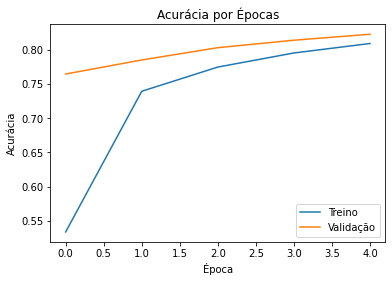

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por Épocas')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])

In [ ]:
modelo.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'name': 'flatten_1_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten_1',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense_2',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.2,
    'seed'

In [ ]:
vieses_camada_dense_zerados = np.zeros((256,))
vieses_camada_dense_aleatorios = np.random.rand(256,)

modelo.layers[1].set_weights([pesos_camada_dense_aleatorios, vieses_camada_dense_zerados])

In [ ]:
adam = keras.optimizers.Adam(lr = 0.001)

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'),
             keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                             monitor='val_loss', save_best_only=True)]#Método de parar cedo caso o val_loss estacione em um valor

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
historico = modelo.fit(imagens_treino, identificacoes_treino, #batch_size= 480,
                       epochs=5, validation_split=0.2, callbacks=callbacks)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 1.7696 - accuracy: 0.2963 - val_loss: 1.5258 - val_accuracy: 0.3863
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 1.7747 - accuracy: 0.2920 - val_loss: 1.5281 - val_accuracy: 0.3769


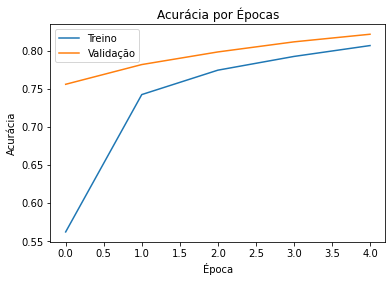

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por Épocas')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend(['Treino', 'Validação'])